# Import packages

In [20]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 500)

import matplotlib.pyplot as plt

plt.style.use('classic')
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.max_rows', 300)

# %config inlinebackend.figure_format = 'svg'

In [21]:
import sys

sys.path.insert(0, 'D:/Trading_backtest_framework')

In [22]:
from src.support import *
from src.backtest import *
from src.models import *

# Import and pre-processing data

## Interval data

In [23]:
interval_data = pd.read_pickle('D:/Trading_backtest_framework/Training/Data/XAUUSD_M15_1.pkl')

interval_data = interval_data.set_index('DATE_TIME')
interval_data.index = pd.to_datetime(interval_data.index)

interval_data['DATE'] = pd.to_datetime(interval_data['DATE'])
interval_data['OPEN'] = interval_data['OPEN']
interval_data['HIGH'] = interval_data['HIGH']
interval_data['LOW'] = interval_data['LOW']
interval_data['CLOSE'] = interval_data['CLOSE']


### Prepare_df

In [24]:
df_4_hour = prepare_df(df = interval_data, timeframe = '4H', add_indicators = True)
df_1_day = prepare_df(df = interval_data, timeframe = '1D', add_indicators = True)
df_15_min = prepare_df(df = interval_data, timeframe = '15min', add_indicators = True)

df_1_day['WHOLE_RANGE'] = df_1_day['HIGH'] - df_1_day['LOW']
df_4_hour['WHOLE_RANGE'] = df_4_hour['HIGH'] - df_4_hour['LOW']
df_15_min['WHOLE_RANGE'] = df_15_min['HIGH'] - df_15_min['LOW']

df_1_day['GRP_WHOLE_RANGE'] = pd.qcut(df_1_day['WHOLE_RANGE'], 10)
df_4_hour['GRP_WHOLE_RANGE'] = pd.qcut(df_4_hour['WHOLE_RANGE'], 10)
df_15_min['GRP_WHOLE_RANGE'] = pd.qcut(df_15_min['WHOLE_RANGE'], 10)

df_1_day['GRP_BODY'] = pd.qcut(df_1_day['BODY'], 10)
df_4_hour['GRP_BODY'] = pd.qcut(df_4_hour['BODY'], 10)
df_15_min['GRP_BODY'] = pd.qcut(df_15_min['BODY'], 10)

df_1_day['YEAR'] = df_1_day.index.strftime('%Y')
df_1_day['WEEK'] = df_1_day.index.strftime('%Y%W')
df_1_day['MONTH'] = df_1_day.index.strftime('%Y%m')

df_4_hour['YEAR'] = df_4_hour.index.strftime('%Y')
df_4_hour['WEEK'] = df_4_hour.index.strftime('%Y%W')
df_4_hour['MONTH'] = df_4_hour.index.strftime('%Y%m')

df_15_min['YEAR'] = df_15_min.index.strftime('%Y')
df_15_min['WEEK'] = df_15_min.index.strftime('%Y%W')
df_15_min['MONTH'] = df_15_min.index.strftime('%Y%m')



In [25]:
df_15_min.shape, df_4_hour.shape, df_1_day.shape, 

((99741, 36), (6783, 36), (1311, 36))

In [26]:
# df_15_min.index[0], df_15_min.index[-1]

In [27]:
# plot_df(df_1_day, 
#         path = None,# 'D:/Intraday_trading/Training/Saved_results/plot_df.html', 
#         open_tab = False)

# Strategy 1

In [28]:
interval_is = interval_data[interval_data.index < datetime(2023, 1, 1)]
interval_os = interval_data[interval_data.index >= datetime(2023, 1, 1)]


In [29]:
df_4_hour_is = prepare_df(df = interval_is, timeframe = '4H', add_indicators = False)
df_1_day_is = prepare_df(df = interval_is, timeframe = '1D', add_indicators = False)
df_15_min_is = prepare_df(df = interval_is, timeframe = '15min', add_indicators = False)

df_1_day_is['WHOLE_RANGE'] = df_1_day_is['HIGH'] - df_1_day_is['LOW']
df_4_hour_is['WHOLE_RANGE'] = df_4_hour_is['HIGH'] - df_4_hour_is['LOW']
df_15_min_is['WHOLE_RANGE'] = df_15_min_is['HIGH'] - df_15_min_is['LOW']

df_1_day_is['GRP_WHOLE_RANGE'] = pd.qcut(df_1_day_is['WHOLE_RANGE'], 10)
df_4_hour_is['GRP_WHOLE_RANGE'] = pd.qcut(df_4_hour_is['WHOLE_RANGE'], 10)
df_15_min_is['GRP_WHOLE_RANGE'] = pd.qcut(df_15_min_is['WHOLE_RANGE'], 10)

df_1_day_is['GRP_BODY'] = pd.qcut(df_1_day_is['BODY'], 10)
df_4_hour_is['GRP_BODY'] = pd.qcut(df_4_hour_is['BODY'], 10)
df_15_min_is['GRP_BODY'] = pd.qcut(df_15_min_is['BODY'], 10)

df_1_day_is['YEAR'] = df_1_day_is.index.strftime('%Y')
df_1_day_is['WEEK'] = df_1_day_is.index.strftime('%Y%W')
df_1_day_is['MONTH'] = df_1_day_is.index.strftime('%Y%m')
df_1_day_is['DATE'] = df_1_day_is.index.strftime('%Y%m%d')

df_4_hour_is['YEAR'] = df_4_hour_is.index.strftime('%Y')
df_4_hour_is['WEEK'] = df_4_hour_is.index.strftime('%Y%W')
df_4_hour_is['MONTH'] = df_4_hour_is.index.strftime('%Y%m')
df_4_hour_is['DATE'] = df_4_hour_is.index.strftime('%Y%m%d')

df_15_min_is['YEAR'] = df_15_min_is.index.strftime('%Y')
df_15_min_is['WEEK'] = df_15_min_is.index.strftime('%Y%W')
df_15_min_is['MONTH'] = df_15_min_is.index.strftime('%Y%m')
df_15_min_is['DATE'] = df_15_min_is.index.strftime('%Y%m%d')

#-----------------------------------------------------

df_4_hour_os = prepare_df(df = interval_os, timeframe = '4H', add_indicators = False)
df_1_day_os = prepare_df(df = interval_os, timeframe = '1D', add_indicators = False)
df_15_min_os = prepare_df(df = interval_os, timeframe = '15min', add_indicators = False)

df_1_day_os['WHOLE_RANGE'] = df_1_day_os['HIGH'] - df_1_day_os['LOW']
df_4_hour_os['WHOLE_RANGE'] = df_4_hour_os['HIGH'] - df_4_hour_os['LOW']
df_15_min_os['WHOLE_RANGE'] = df_15_min_os['HIGH'] - df_15_min_os['LOW']

df_1_day_os['GRP_WHOLE_RANGE'] = pd.qcut(df_1_day_os['WHOLE_RANGE'], 10)
df_4_hour_os['GRP_WHOLE_RANGE'] = pd.qcut(df_4_hour_os['WHOLE_RANGE'], 10)
df_15_min_os['GRP_WHOLE_RANGE'] = pd.qcut(df_15_min_os['WHOLE_RANGE'], 10)

df_1_day_os['GRP_BODY'] = pd.qcut(df_1_day_os['BODY'], 10)
df_4_hour_os['GRP_BODY'] = pd.qcut(df_4_hour_os['BODY'], 10)
df_15_min_os['GRP_BODY'] = pd.qcut(df_15_min_os['BODY'], 10)

df_1_day_os['YEAR'] = df_1_day_os.index.strftime('%Y')
df_1_day_os['WEEK'] = df_1_day_os.index.strftime('%Y%W')
df_1_day_os['MONTH'] = df_1_day_os.index.strftime('%Y%m')

df_4_hour_os['YEAR'] = df_4_hour_os.index.strftime('%Y')
df_4_hour_os['WEEK'] = df_4_hour_os.index.strftime('%Y%W')
df_4_hour_os['MONTH'] = df_4_hour_os.index.strftime('%Y%m')

df_15_min_os['YEAR'] = df_15_min_os.index.strftime('%Y')
df_15_min_os['WEEK'] = df_15_min_os.index.strftime('%Y%W')
df_15_min_os['MONTH'] = df_15_min_os.index.strftime('%Y%m')


## In sample results

In [30]:
config = {'RSI_PARAMS': {'INPUT_PARAM': 14, 'CUTOFF_BUY': 30, 'CUTOFF_SELL': 70}, 
        'base_SL': 10, 
        'base_TP': 20
         }

alpha = RSI_strat(config = config)

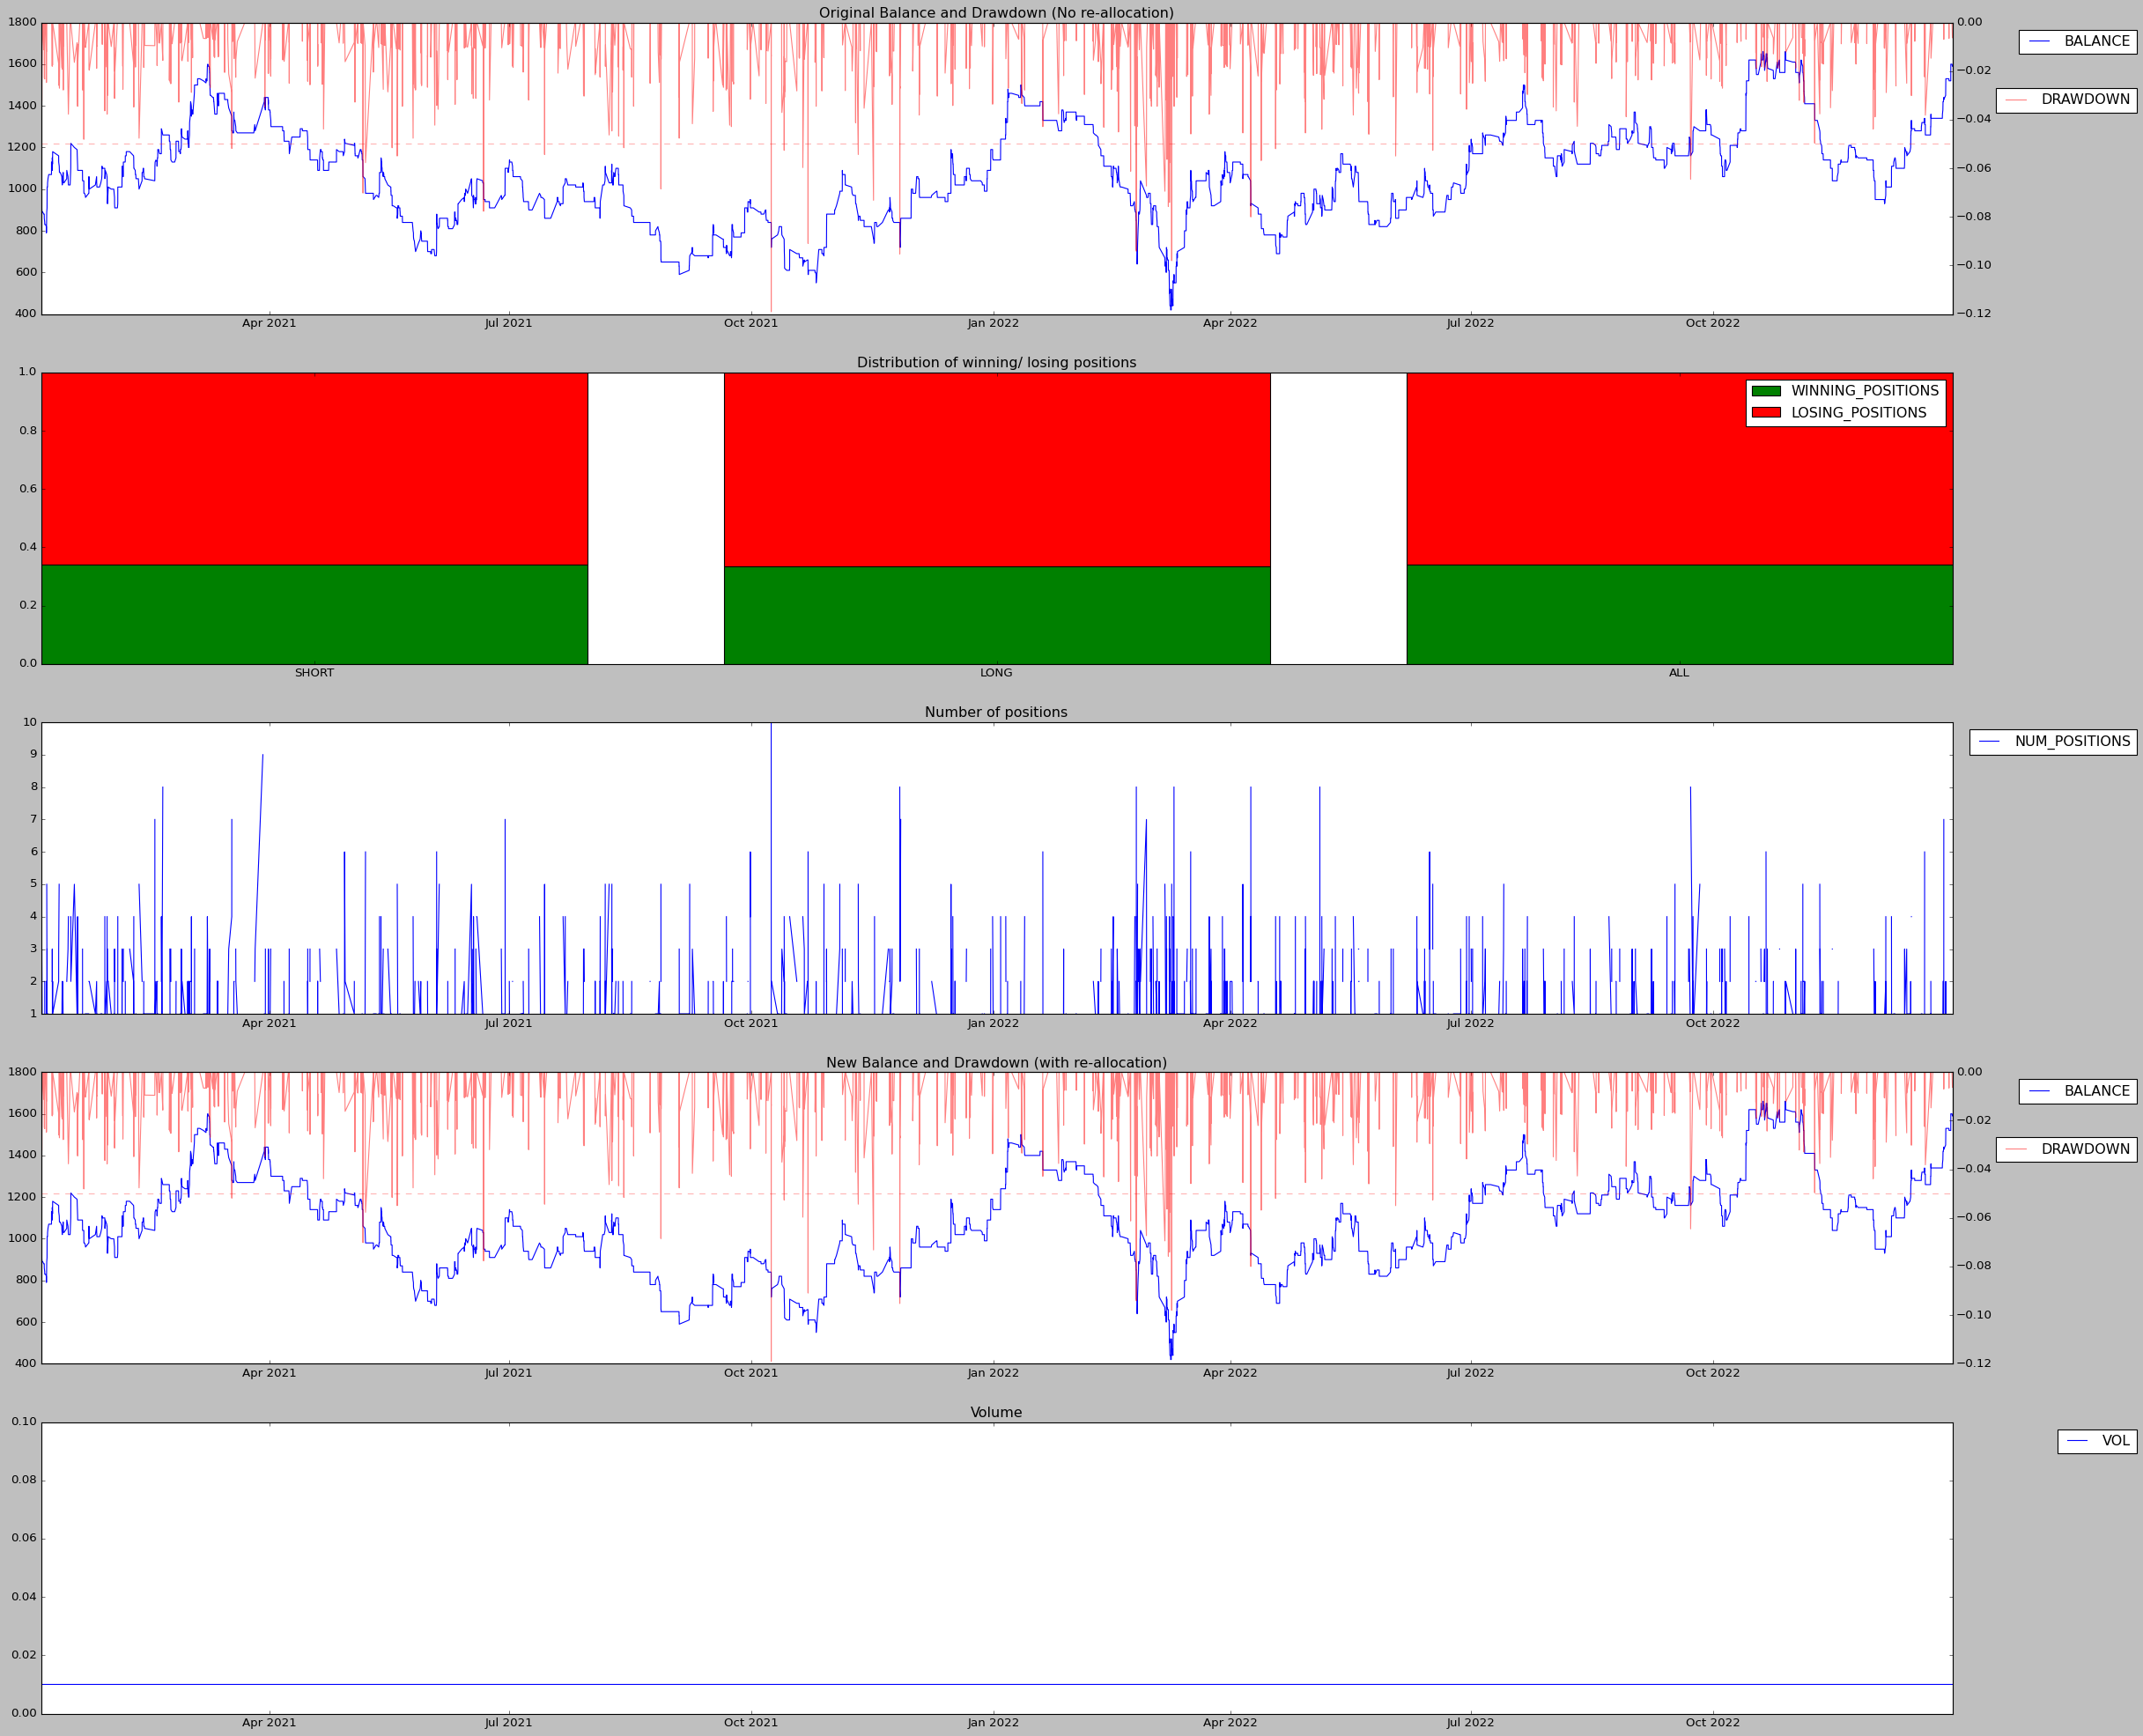

In [31]:
report_is = Backtest_report(alpha = alpha,
                            df_is = df_15_min_is.copy(),
                            base_SL = 10,
                            base_TP = 20,
                            max_existing_positions = 5,
                            init_vol = 0.01,
                            re_allocation = True,
                            incre_vol = 0.01,
                            max_vol = 0.1,
                            init_cap = 1000,
                            incre_cap = 2
                            )

report_is.display_report()

In [32]:
# report_is.prepare_report()

In [33]:
df_result_is = report_is.df_result_is
df_balance_is = report_is.df_balance_is
df_balance_new = report_is.df_balance_new

In [34]:
df_result_is['CLOSE'] = df_result_is['CLOSE_open'].copy()

In [35]:
df_summary = pd.concat(
    [
        pd.pivot_table(
            report_is.df_result_is[(report_is.df_result_is['FLAG_VALID_POSITION'] == 1) & (report_is.df_result_is['SIGNAL'] != 0) & (report_is.df_result_is['PNL'] > 0)],
            index = 'SIGNAL',
            values = 'CLOSE_open',
            aggfunc = 'count',
            margins = True
        ),
        pd.pivot_table(
            report_is.df_result_is[(report_is.df_result_is['FLAG_VALID_POSITION'] == 1) & (report_is.df_result_is['SIGNAL'] != 0) & (report_is.df_result_is['PNL'] < 0)],
            index = 'SIGNAL',
            values = 'CLOSE_open',
            aggfunc = 'count',
            margins = True
        )
    ],
    axis = 1
)

df_summary.columns = ['WINNING_POSITIONS', 'LOSING_POSITIONS']
df_summary.index = ['SHORT', 'LONG', 'ALL']
df_summary = df_summary.fillna(0)
df_summary['TOTAL_POSITIONS'] = df_summary['WINNING_POSITIONS'] + df_summary['LOSING_POSITIONS']

display(df_summary)

,WINNING_POSITIONS,LOSING_POSITIONS,TOTAL_POSITIONS
SHORT,843,1629,2472
LONG,169,336,505
ALL,1012,1965,2977


# Strategy 2

## In sample results

In [36]:
config = {
            'base_SL': 10, 
            'base_TP': 20,
            'DECISION_CUTOFF': {'ENTRY_BUY_CUTOFF': 1, 'ENTRY_SELL_CUTOFF': -1}
        }

alpha = MCMC_strat_v1(config = config)

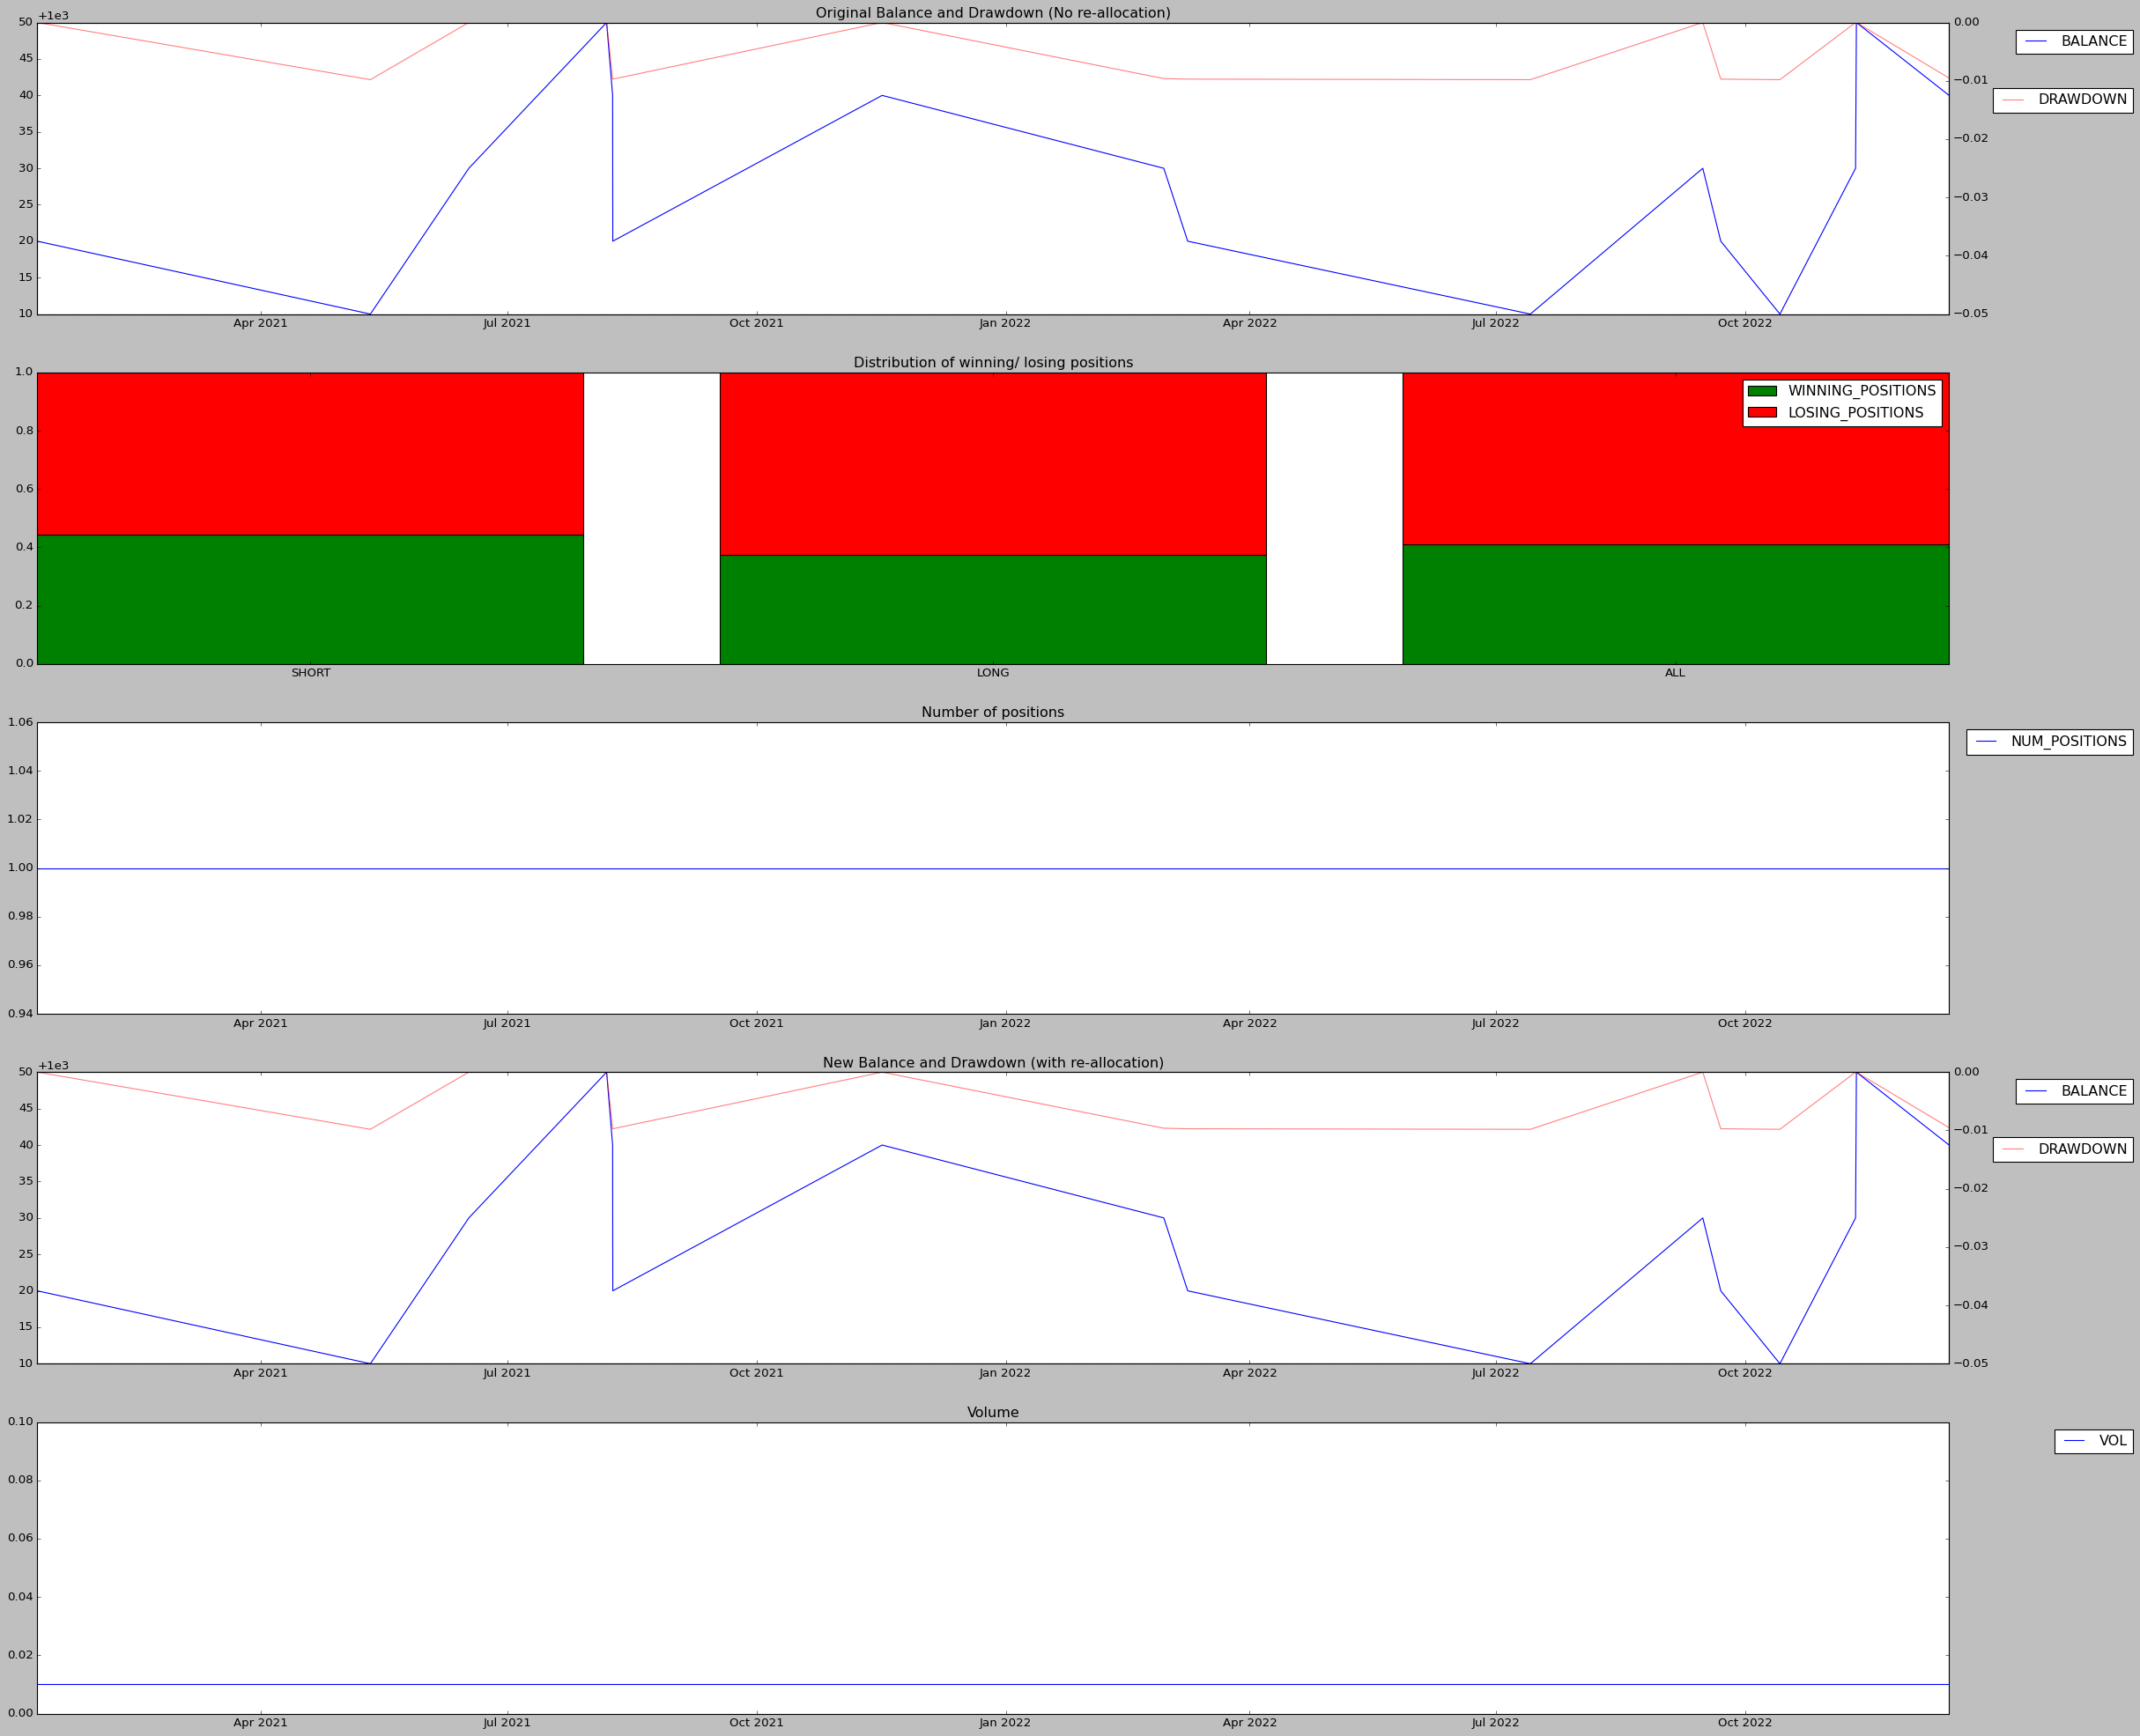

In [37]:
report_is = Backtest_report(alpha = alpha,
                            df_is = df_15_min_is.copy(),
                            base_SL = 10,
                            base_TP = 20,
                            max_existing_positions = 5,
                            init_vol = 0.01,
                            re_allocation = True,
                            incre_vol = 0.01,
                            max_vol = 0.1,
                            init_cap = 1000,
                            incre_cap = 2
                            )

report_is.display_report()

In [38]:
df_summary = pd.concat(
    [
        pd.pivot_table(
            report_is.df_result_is[(report_is.df_result_is['FLAG_VALID_POSITION'] == 1) & (report_is.df_result_is['SIGNAL'] != 0) & (report_is.df_result_is['PNL'] > 0)],
            index = 'SIGNAL',
            values = 'CLOSE_open',
            aggfunc = 'count',
            margins = True
        ),
        pd.pivot_table(
            report_is.df_result_is[(report_is.df_result_is['FLAG_VALID_POSITION'] == 1) & (report_is.df_result_is['SIGNAL'] != 0) & (report_is.df_result_is['PNL'] < 0)],
            index = 'SIGNAL',
            values = 'CLOSE_open',
            aggfunc = 'count',
            margins = True
        )
    ],
    axis = 1
)

df_summary.columns = ['WINNING_POSITIONS', 'LOSING_POSITIONS']
df_summary.index = ['SHORT', 'LONG', 'ALL']
df_summary = df_summary.fillna(0)
df_summary['TOTAL_POSITIONS'] = df_summary['WINNING_POSITIONS'] + df_summary['LOSING_POSITIONS']

display(df_summary)

,WINNING_POSITIONS,LOSING_POSITIONS,TOTAL_POSITIONS
SHORT,4,5,9
LONG,3,5,8
ALL,7,10,17
